In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


import csv file

In [16]:
df = pd.read_csv('mental-heath-in-tech-2016_20161114.csv', encoding='utf-8')

print head and info for some overview of the data

In [17]:
print(df.head())

   Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \


In [18]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1433 entries, 0 to 1432
Data columns (total 63 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                            --------------  -----  
 0   Are you self-employed?                                                                                                                                                            1433 non-null   int64  
 1   How many employees does your company or organization have?                                                                                                                        1146 non-null   object 
 2   Is your employer primarily a tech company/organization?     

## data preprocessing
we need to clean some columns before we continue. this includes renaming all columns for easier handling, such that we dont need to use the complete question. standardizing age column, mental health condition column.

In [28]:
# Rename all columns so they are handled more easily
# Define a dictionary to map old column names to new ones
column_map = {
    'Are you self-employed?': 'self_employed',
    'How many employees does your company or organization have?': 'company_size',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Is your primary role within your company related to tech/IT?': 'tech_role',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'emp_mh_benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'know_mh_options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'emp_discussed_mh',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'mh_resources',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity_protected',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'leave_difficulty',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'neg_consequences_mental_discuss',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'neg_consequences_physical_discuss',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'comfortable_discuss_coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'comfortable_discuss_supervisors',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'emp_mh_seriously',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'observed_neg_consequences',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?': 'mh_coverage',
    'Do you know local or online resources to seek help for a mental health disorder?': 'know_local_online_resources',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_clients',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'neg_impact_reveal_clients',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'reveal_coworkers',
    'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'neg_impact_reveal_coworkers',
    'Do you believe your productivity is ever affected by a mental health issue?': 'mh_affects_productivity',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'productivity_affected_percent',
    'Do you have previous employers?': 'previous_emp',
    'Have your previous employers provided mental health benefits?': 'previous_emp_mh_benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'aware_prev_mh_options',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'prev_employers_discussed_mh',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'prev_mh_resources',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'prev_anonymity_protected',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'prev_neg_consequences_discuss',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'prev_neg_consequences_physical',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'prev_comfortable_discuss_coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'prev_comfortable_discuss_supervisors',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'prev_emp_mh_seriously',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'prev_observed_neg_consequences',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'mention_discuss_physical_interview',
    'Why or why not?': 'mention_discuss_physical_interview_reason',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'mention_discuss_mh_interview',
    'Why or why not?.1': 'mention_discuss_mh_interview_reason',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'mh_hurt_career',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'coworkers_view_negatively',
    'How willing would you be to share with friends and family that you have a mental illness?': 'willing_share_friends_family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'experienced_unsupportive_response',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'others_experience_affect_you',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you had a mental health disorder in the past?': 'past_mh_disorder',
    'Do you currently have a mental health disorder?': 'current_mh_disorder',
    'If yes, what condition(s) have you been diagnosed with?': 'diagnosed_conditions',
    'If maybe, what condition(s) do you believe you have?': 'believed_conditions',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'professionally_diagnosed',
    'If so, what condition(s) were you diagnosed with?': 'professional_diagnoses',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'sought_treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'work_interference_treated',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'work_interference_untreated',
    'What is your age?': 'age',
    'What is your gender?': 'gender',
    'What country do you live in?': 'country',
    'What US state or territory do you live in?': 'state',
    'What country do you work in?': 'work_country',
    'What US state or territory do you work in?': 'work_state',
    'Which of the following best describes your work position?': 'position',
    'Do you work remotely?': 'remote_work'
}

# Rename the columns
df.rename(columns=column_map, inplace=True)

In [41]:
# Clean up the gender column
male_values = [
    'male', 'Male ', 'M', 'm', 'man', 'Cis male',
    'Male.', 'Male (cis)', 'Man', 'Sex is male',
    'cis male', 'Malr', 'Dude', "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
    'mail', 'M|', 'male ', 'Cis Male', 'Male (trans, FtM)',
    'cisdude', 'cis man', 'MALE'
]

female_values = [
    'female', 'I identify as female.', 'female ',
    'Female assigned at birth ', 'F', 'Woman', 'fm', 'f',
    'Cis female', 'Transitioned, M2F', 'Female or Multi-Gender Femme',
    'Female ', 'woman', 'female/woman', 'Cisgender Female', 
    'mtf', 'fem', 'Female (props for making this a freeform field, though)',
    ' Female', 'Cis-woman', 'AFAB', 'Transgender woman',
    'Cis female '
]

other_values = [
    'Bigender', 'non-binary,', 'Genderfluid (born female)',
    'Other/Transfeminine', 'Androgynous', 'male 9:1 female, roughly',
    'nb masculine', 'genderqueer', 'Human', 'Genderfluid',
    'Enby', 'genderqueer woman', 'Queer', 'Agender', 'Fluid',
    'Genderflux demi-girl', 'female-bodied; no feelings about gender',
    'non-binary', 'Male/genderqueer', 'Nonbinary', 'Other', 'none of your business',
    'Unicorn', 'human', 'Genderqueer'
]

df['gender'] = df['gender'].replace(male_values, 'Male')
df['gender'] = df['gender'].replace(female_values, 'Female')
df['gender'] = df['gender'].replace(other_values, 'Others')

# replace missing values for three rows for gender with the mode Male
df['gender'] = df['gender'].replace(np.nan, 'Male')

In [43]:
df['gender'].unique()
df['gender'].count()

array(['Male', 'Female', 'Others'], dtype=object)

np.int64(1433)

In [54]:
# List of all unique conditions
conditions = [
    'Anxiety Disorder',
    'Mood Disorder',
    'Attention Deficit Hyperactivity Disorder',
    'Post-traumatic Stress Disorder',
    'Stress Response Syndromes',
    'Personality Disorder',
    'Obsessive-Compulsive Disorder',
    'Eating Disorder',
    'Substance Use Disorder',
    'Addictive Disorder',
    'Psychotic Disorder',
    'Dissociative Disorder',
    'Autism',
    'Asperger Syndrome',
    'Gender Identity Disorder',
    'Intimate Disorder',
    'Traumatic Brain Injury',
    'Seasonal Affective Disorder',
    'Burn out',
    'Depersonalization Disorder',
    'Tinnitus',
    'Suicidal Ideation'
]

# Function to check if a condition is present
# For PDD-NOS we also use Autism
def has_condition(row, condition):
    if pd.isna(row):
        return 0
    if condition == 'Autism':
        return 1 if any(c in row for c in ['Autism', 'PDD-NOS']) else 0
    return 1 if condition in row else 0

# Create binary columns for each condition, that has been professionally diagnosed
for condition in conditions:
    df[f'Has_{condition.replace(" ", "_")}'] = df['professional_diagnoses'].apply(lambda x: has_condition(x, condition))

In [56]:
df.describe()

,self_employed,tech_company,tech_role,Do you have medical coverage (private insurance or state-provided) which includes treatment of mental health issues?,previous_emp,sought_treatment,age,Has_Anxiety_Disorder,Has_Mood_Disorder,Has_Attention_Deficit_Hyperactivity_Disorder,...,Has_Autism,Has_Asperger_Syndrome,Has_Gender_Identity_Disorder,Has_Intimate_Disorder,Has_Traumatic_Brain_Injury,Has_Seasonal_Affective_Disorder,Has_Burn_out,Has_Depersonalization_Disorder,Has_Tinnitus,Has_Suicidal_Ideation
count,1433.000000,1146.000000,263.000000,287.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,1433.000000,...,1433.000000,1433.000000,1433.000000,1433.000000,1433.0,1433.000000,1433.000000,1433.0,1433.0,1433.000000
mean,0.200279,0.770506,0.942966,0.644599,0.882066,0.585485,34.286113,0.260293,0.367062,0.093510,...,0.004885,0.000698,0.000698,0.000698,0.0,0.000698,0.000698,0.0,0.0,0.000698
std,0.400349,0.420691,0.232350,0.479471,0.322643,0.492810,11.290931,0.438948,0.482172,0.291248,...,0.069745,0.026417,0.026417,0.026417,0.0,0.026417,0.026417,0.0,0.0,0.026417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,28.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,33.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,323.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000


### descriptive statistics
because there are so man columns i write the statistics into a .txt file

In [19]:
# Function to get descriptive statistics for categorical variables
def categorical_stats(series):
    counts = series.value_counts()
    percentages = counts / len(series) * 100
    return pd.concat([counts, percentages], axis=1, keys=['Count', 'Percentage'])

# Function to get descriptive statistics for numerical variables
def numerical_stats(series):
    return series.describe()

# Separate categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Open a file to write the results
with open('dataset_statistics.txt', 'w') as f:
    f.write("Categorical Variables:\n")
    for col in categorical_cols:
        f.write(f"\n{col}:\n")
        stats = categorical_stats(df[col])
        # Reset index to avoid double column names
        stats.index.name = None
        f.write(stats.to_string())
        f.write("\n")

    f.write("\n\nNumerical Variables:\n")
    for col in numerical_cols:
        f.write(f"\n{col}:\n")
        f.write(str(numerical_stats(df[col])))
        f.write("\n")

print("Statistics have been saved to 'dataset_statistics.txt'")

23

61

237

1

84

254

1

98

131

1

137

127

1

110

127

1

145

127

1

110

321

1

109

99

1

108

99

1

86

99

1

97

99

1

86

127

1

134

68

1

83

159

1

127

365

1

127

127

1

121

365

1

121

199

1

78

199

1

135

134

1

64

184

1

92

254

1

132

184

1

111

147

1

143

159

1

114

179

1

113

143

1

94

223

1

95

279

1

96

184

1

121

143

1

102

99

1

18

2718257

1

86

99

1

20

1224772

1

99

275

1

129

287

1

92

510

1

141

189

1

179

99

1

50

127

1

53

99

1

50

99

1

58

45278

1

55

34699

1

84

68

1

52

35684

1

115

239

1

119

239

1

23

12566

1

31

2375

1

45

1919

1

31

2375

1

45

1959

1

60

41869

1

24

115

1

23

25

212

1

58

245

1

63

242

1

120

299

1

34

221

1

94

281

1

20

207

1

Statistics have been saved to 'dataset_statistics.txt'


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Do you currently have a mental health disorder?'>

Text(0.5, 1.0, 'Distribution of Mental Health Conditions')

Text(0.5, 0, 'Response')

Text(0, 0.5, 'Count')

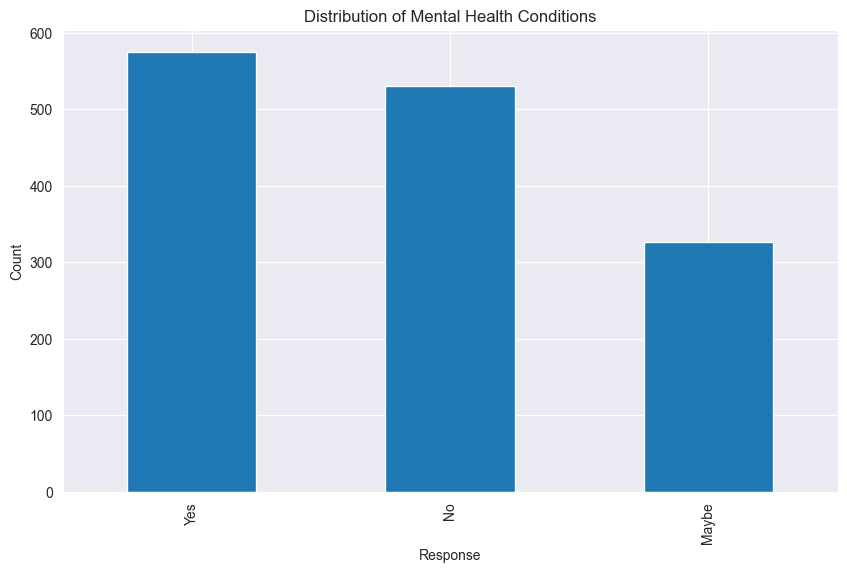

In [20]:
# 1. Bar plot: Mental health condition distribution
plt.figure(figsize=(10, 6))
df['Do you currently have a mental health disorder?'].value_counts().plot(kind='bar')
plt.title('Distribution of Mental Health Conditions')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

<Figure size 800x800 with 0 Axes>

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Gender Distribution')

Text(0, 0.5, '')

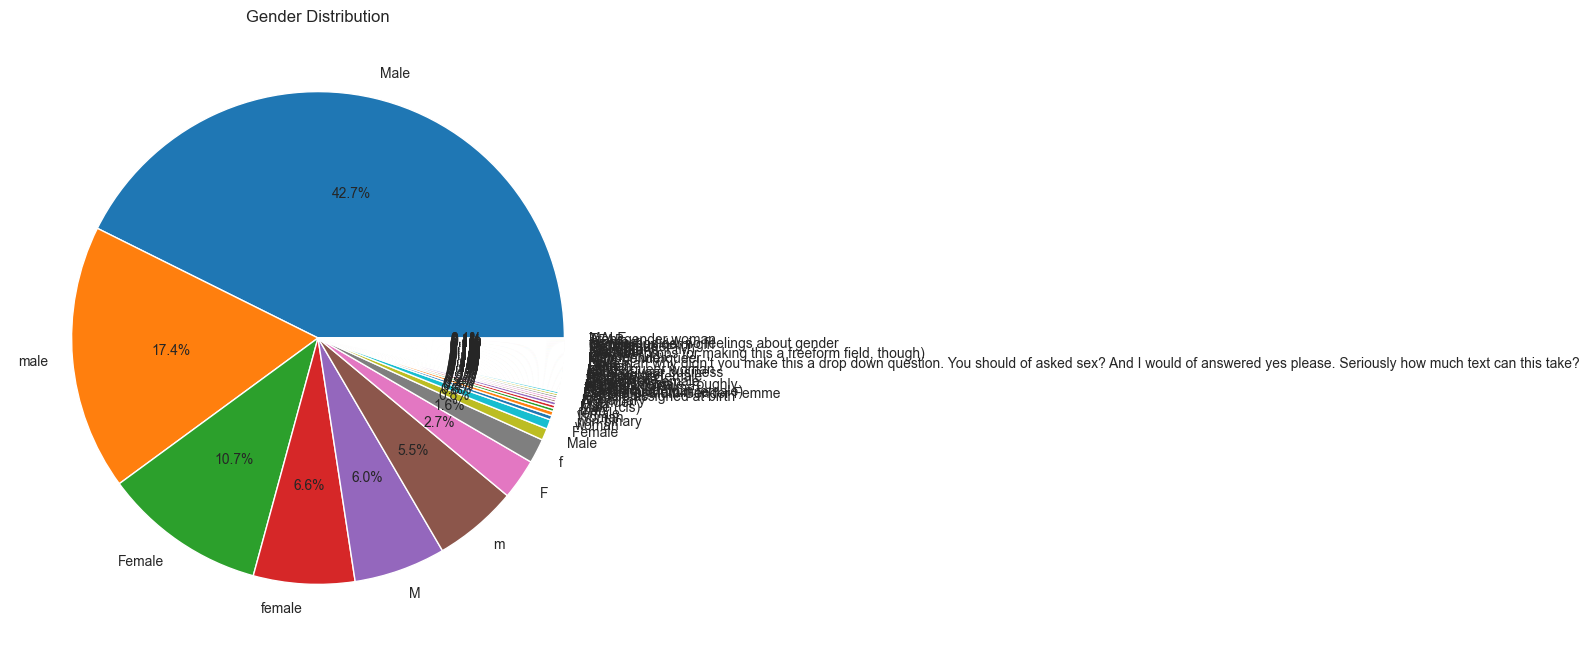

In [21]:
# 2. Pie chart: Gender distribution
plt.figure(figsize=(8, 8))
df['What is your gender?'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Age Distribution')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

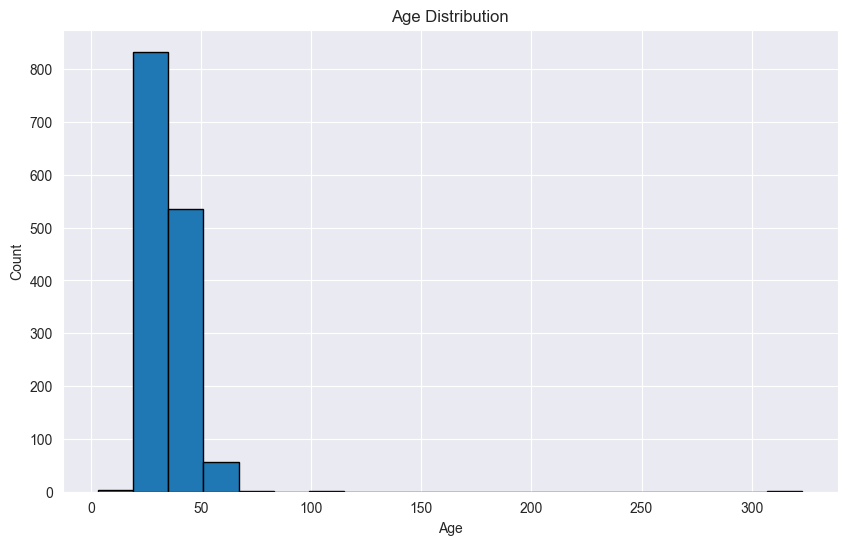

In [22]:
# 3. Histogram: Age distribution
plt.figure(figsize=(10, 6))
df['What is your age?'].hist(bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap of Numerical Variables')

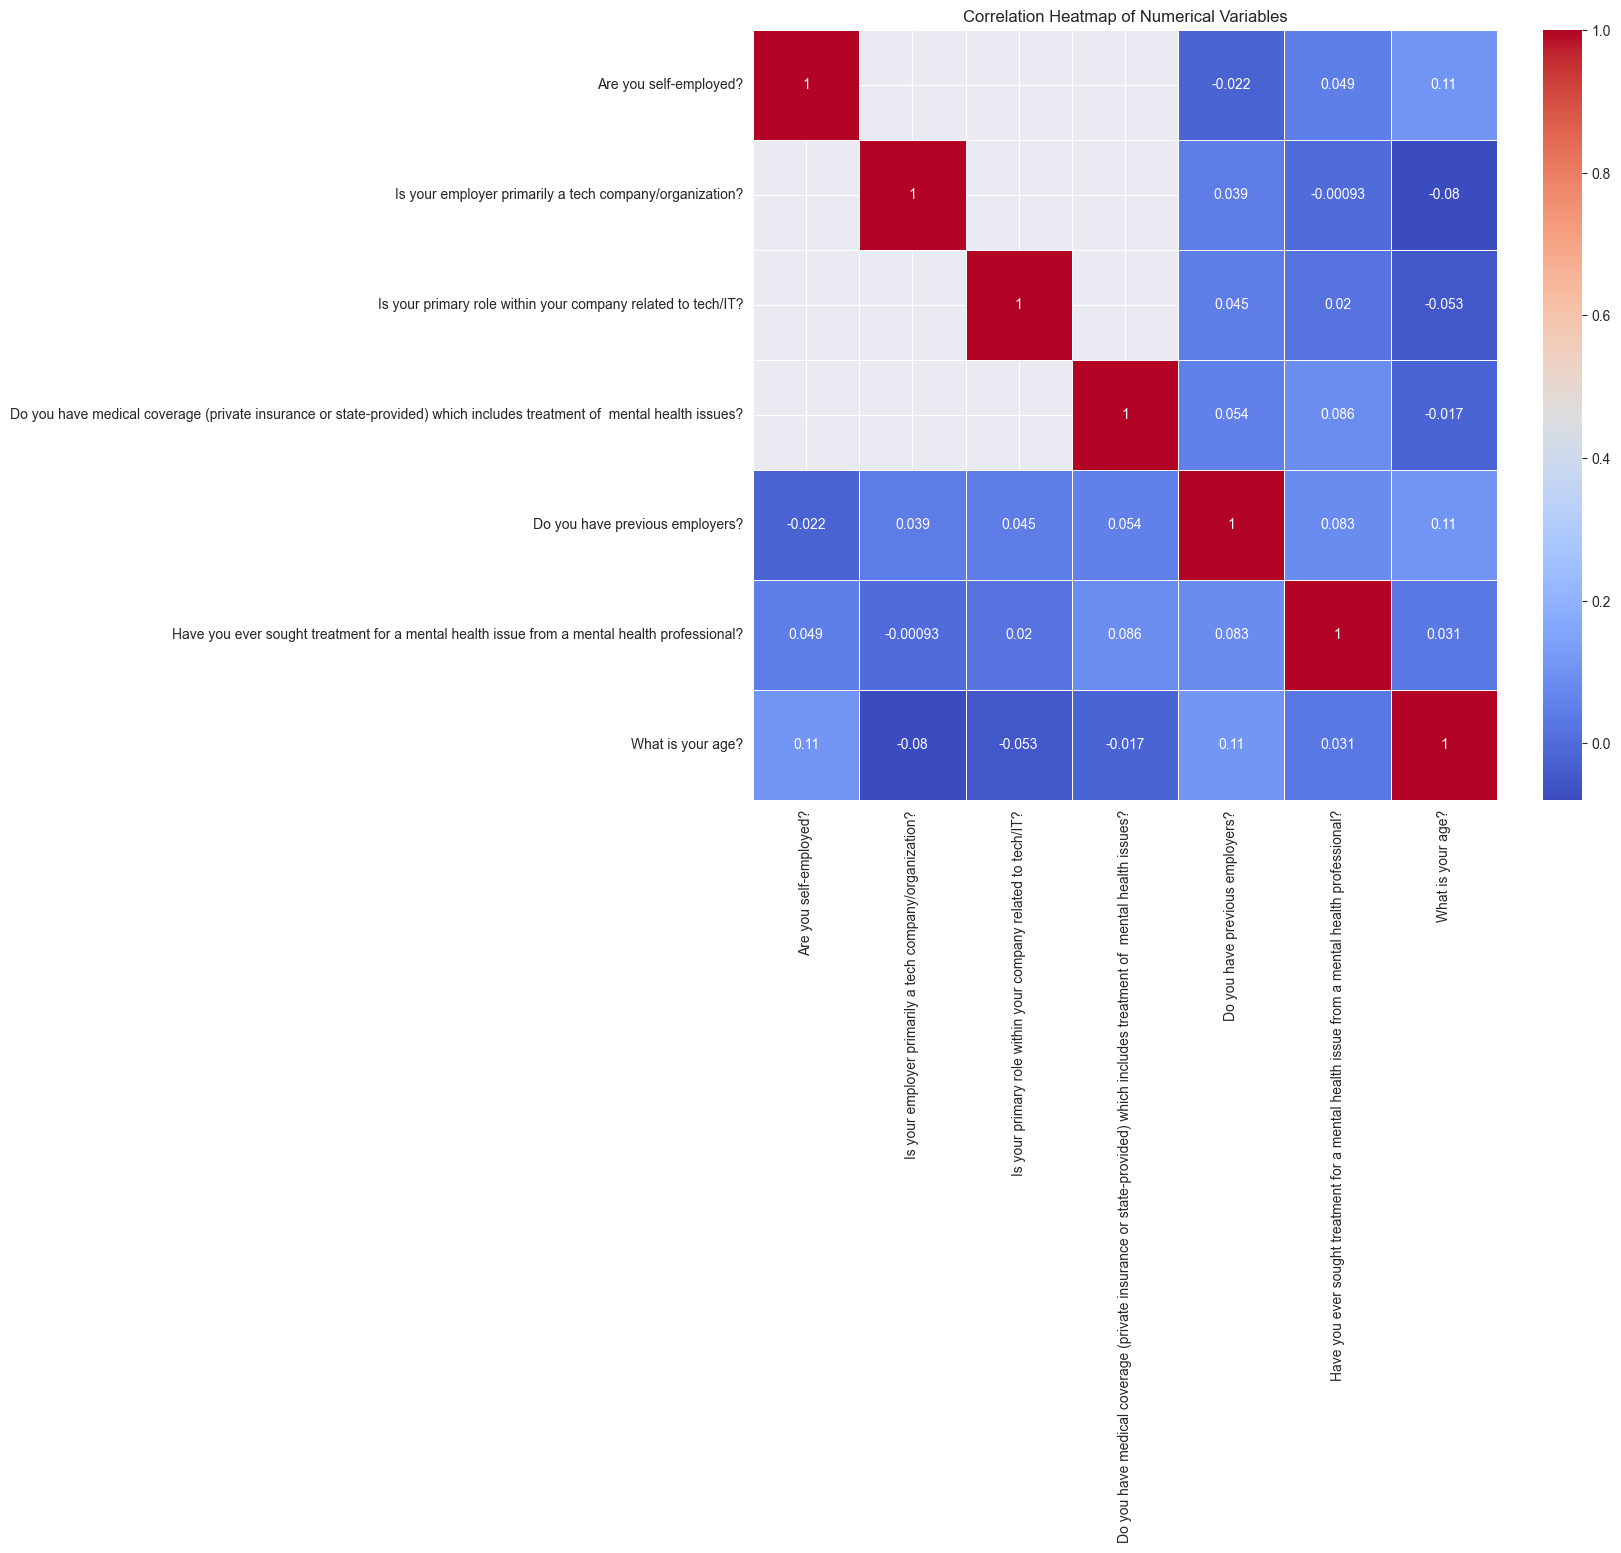

In [23]:
# 5. Heatmap: Correlation between numerical variables
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Do you currently have a mental health disorder?', ylabel='What is your age?'>

Text(0.5, 1.0, 'Age Distribution by Mental Health Condition')

Text(0.5, 0, 'Mental Health Condition')

Text(0, 0.5, 'Age')

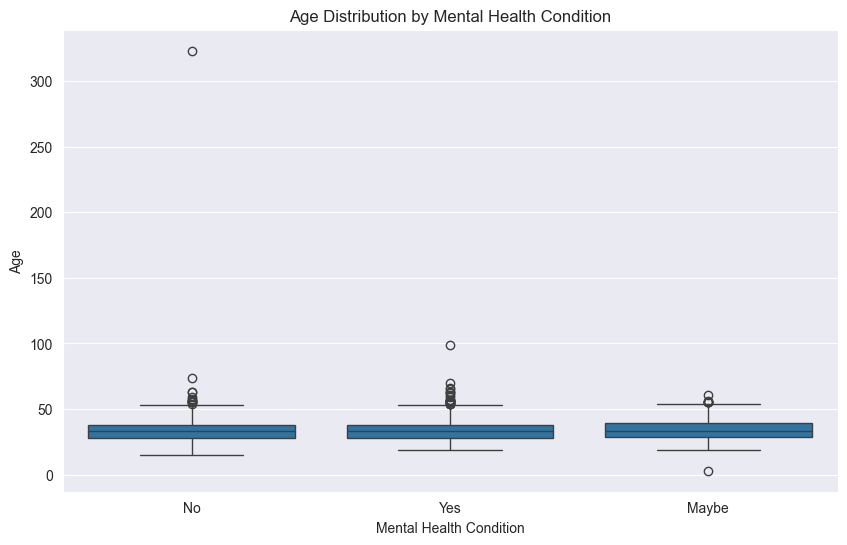

In [24]:
# 6. Box plot: Age distribution by mental health condition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Do you currently have a mental health disorder?', y='What is your age?', data=df)
plt.title('Age Distribution by Mental Health Condition')
plt.xlabel('Mental Health Condition')
plt.ylabel('Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Work Remotely (Never)')

Text(0.5, 1.0, 'Clusters of Survey Respondents')

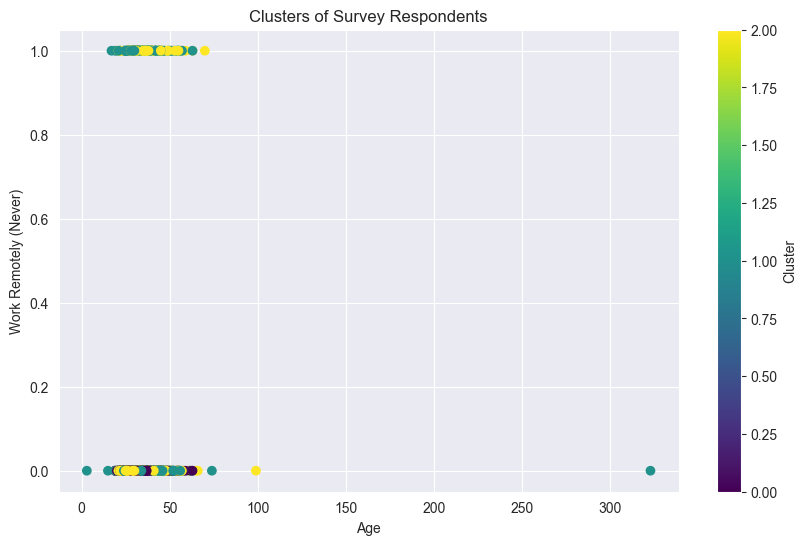

In [25]:
# Select features for clustering
features = ['What is your age?', 
            'Do you work remotely?',
            'Do you currently have a mental health disorder?']

# Prepare the data
X = pd.get_dummies(df[features], columns=['Do you work remotely?', 'Do you currently have a mental health disorder?'])

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X['What is your age?'], X.iloc[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Work Remotely (Never)')
plt.title('Clusters of Survey Respondents')
plt.colorbar(label='Cluster')
plt.show()